In [4]:
%config Completer.use_jedi = False

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import sklearn

In [61]:
print(sklearn.__version__)

0.23.1


In [6]:
df = pd.read_csv('finaldf_orderd.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Subject_ID,diagadhd,CHILDgender,age,sws_total,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,sub-0015,0,1,13.0,1.513333,1.304940,-0.129129,-0.255912,-0.144680,0.425599,...,-0.164447,-0.464885,0.443390,-0.571002,-0.303500,-0.378953,0.563376,-0.601837,-0.388848,-0.467961
1,sub-0085,0,0,11.5,2.560000,0.416967,-0.370917,0.014907,-0.385798,0.401915,...,-0.535982,-0.579071,0.550866,-0.168972,-0.651936,-0.535457,0.428719,-0.439474,-0.705622,-0.601932
2,sub-0134,0,1,13.0,2.346667,1.376817,0.249346,0.287834,-0.004400,0.446980,...,0.226537,-0.060230,0.743458,-0.105006,-0.325386,0.053537,0.581800,-0.229170,-0.227449,-0.026262
3,sub-0152,0,0,11.5,2.066667,0.620056,-0.054428,0.011391,-0.038562,0.456898,...,-0.237428,-0.031055,0.691905,-0.262465,-0.103280,0.214787,0.638877,-0.411452,-0.345689,0.352952
4,sub-0260,1,1,11.5,3.120000,0.760185,-0.241427,-0.121562,-0.235275,0.387195,...,0.283735,0.201138,0.350098,-0.357051,-0.141482,0.063200,0.487531,-0.119186,-0.046044,0.383860


In [83]:
# Separating the dependent and independent variables
y = df['diagadhd']
X = df.iloc[0:117, 5:1817]

X.head()

,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,zfALFF_17Networks_10,zDCwei_17Networks_10,zReHo_17Networks_10,gmd_17Networks_11,zfALFF_17Networks_11,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,1.304940,-0.129129,-0.255912,-0.144680,0.425599,-0.338851,-0.338808,-0.247837,0.405931,-0.541211,...,-0.164447,-0.464885,0.443390,-0.571002,-0.303500,-0.378953,0.563376,-0.601837,-0.388848,-0.467961
1,0.416967,-0.370917,0.014907,-0.385798,0.401915,-0.464206,0.353899,-0.060203,0.574304,-0.498952,...,-0.535982,-0.579071,0.550866,-0.168972,-0.651936,-0.535457,0.428719,-0.439474,-0.705622,-0.601932
2,1.376817,0.249346,0.287834,-0.004400,0.446980,-0.141933,0.146054,-0.040848,0.431066,-0.440187,...,0.226537,-0.060230,0.743458,-0.105006,-0.325386,0.053537,0.581800,-0.229170,-0.227449,-0.026262
3,0.620056,-0.054428,0.011391,-0.038562,0.456898,0.038554,0.193318,0.034392,0.463228,-0.238875,...,-0.237428,-0.031055,0.691905,-0.262465,-0.103280,0.214787,0.638877,-0.411452,-0.345689,0.352952
4,0.760185,-0.241427,-0.121562,-0.235275,0.387195,-0.098687,-0.047486,-0.254101,0.423506,-0.549661,...,0.283735,0.201138,0.350098,-0.357051,-0.141482,0.063200,0.487531,-0.119186,-0.046044,0.383860


In [104]:
#model = ExtraTreesClassifier(n_estimators = 100, max_features = 20, min_samples_split=3)
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_)

ExtraTreesClassifier()

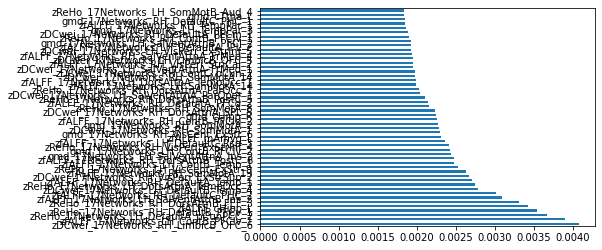

In [105]:
feat_importances = pd.Series(model.feature_importances_ , index = df.columns[5:])
feat_importances.nlargest(50).plot(kind = 'barh')
plt.show()

In [106]:
feat_imp = pd.DataFrame(feat_importances)
feat_imp.reset_index(inplace = True)
feat_imp.rename(columns={'index': 'region', 0:'importance'}, inplace = True)
feat_imp.sort_values(by='importance', ascending=False,inplace=True)
feat_imp.head(30)

,region,importance
1282,zDCwei_17Networks_RH_LimbicB_OFC_6,0.004082
137,zfALFF_17Networks_LH_ContB_PFClv_1,0.003895
231,zReHo_17Networks_LH_DefaultA_pCunPCC_2,0.003672
1091,zReHo_17Networks_RH_DefaultB_PFCv_1,0.003540
1709,zfALFF_cHipp_L,0.003428
1199,zReHo_17Networks_RH_DorsAttnB_FEF_3,0.003315
581,zfALFF_17Networks_LH_SalVentAttnB_Ins_2,0.003096
1121,zfALFF_17Networks_RH_DefaultC_PHC_2,0.003015
326,zDCwei_17Networks_LH_DefaultB_Temp_4,0.002789
407,zReHo_17Networks_LH_DorsAttnA_TempOcc_2,0.002742


### checking the number of trees

>10 0.849 (0.031)
>50 0.903 (0.022)
>100 0.903 (0.024)
>500 0.912 (0.027)
>1000 0.915 (0.025)
>5000 0.912 (0.025)


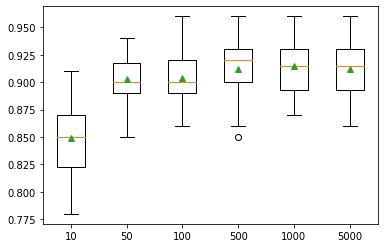

In [107]:
# explore extra trees number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### => number of trees = 100 is the best for our algorithm

### checking max features:
### *** max features = sqrt(number of features) [usually]
##### => max features = 42

### checking min_sample_split

>2 0.908 (0.025)
>3 0.911 (0.028)
>4 0.906 (0.028)
>5 0.905 (0.022)
>6 0.907 (0.027)
>7 0.900 (0.025)
>8 0.900 (0.027)
>9 0.896 (0.024)
>10 0.897 (0.029)
>11 0.895 (0.027)
>12 0.893 (0.030)
>13 0.891 (0.028)
>14 0.888 (0.025)


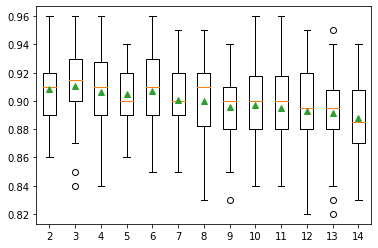

In [63]:
# explore extra trees minimum number of samples for a split effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore the number of samples per split from 2 to 14
	for i in range(2, 15):
		models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# feature engineering